In [6]:
import pandas as pd

df = pd.read_csv("house_prices.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [7]:
df.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

In [8]:
%matplotlib inline

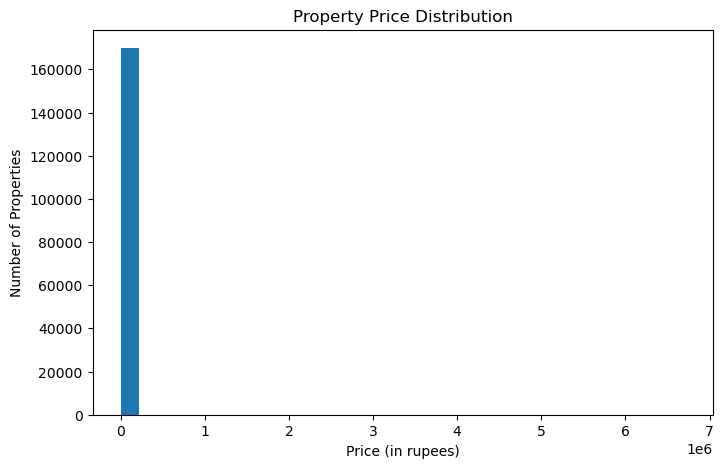

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Price (in rupees)'], bins=30)
plt.title("Property Price Distribution")
plt.xlabel("Price (in rupees)")
plt.ylabel("Number of Properties")
plt.show()

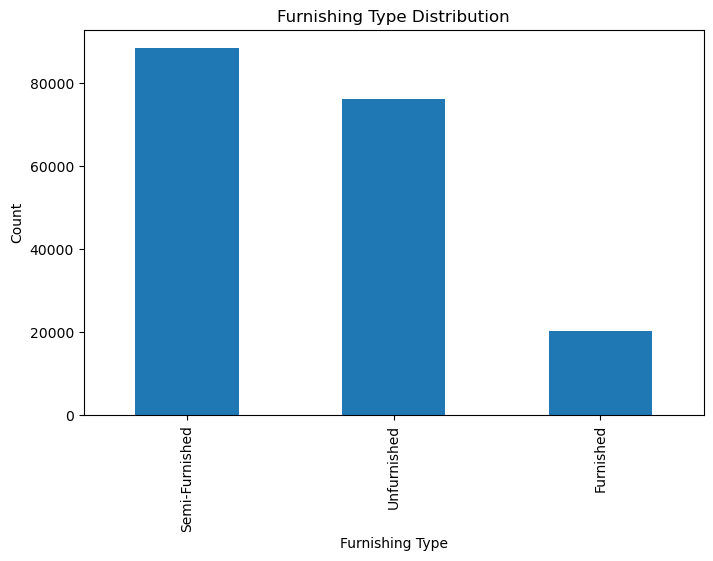

In [10]:
import matplotlib.pyplot as plt

df['Furnishing'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Furnishing Type Distribution")
plt.xlabel("Furnishing Type")
plt.ylabel("Count")
plt.show()

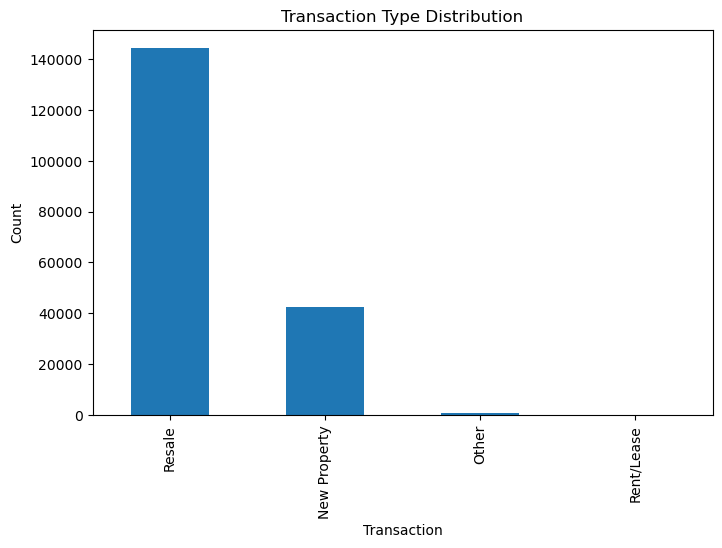

In [11]:
df['Transaction'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction")
plt.ylabel("Count")
plt.show()

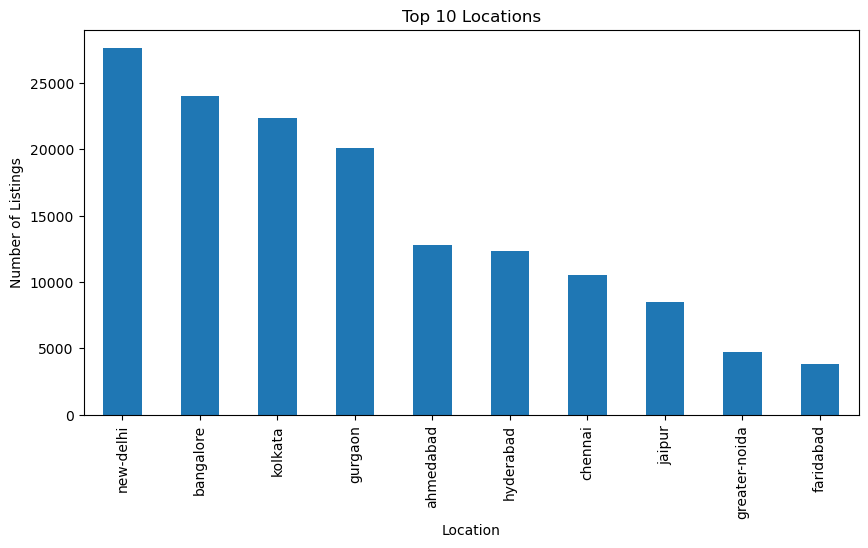

In [12]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_locations.plot(kind='bar')
plt.title("Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Number of Listings")
plt.show()

In [13]:
import pandas as pd

df['Price (in rupees)'] = pd.to_numeric(
    df['Price (in rupees)'].astype(str).str.replace(',', '', regex=False),
    errors='coerce'
)

def extract_number(series):
    return pd.to_numeric(
        series.astype(str).str.extract(r'(\d+(?:\.\d+)?)')[0],
        errors='coerce'
    )

df['Carpet Area'] = extract_number(df['Carpet Area'])
df['Super Area']  = extract_number(df['Super Area'])
df['Plot Area']   = extract_number(df['Plot Area'])

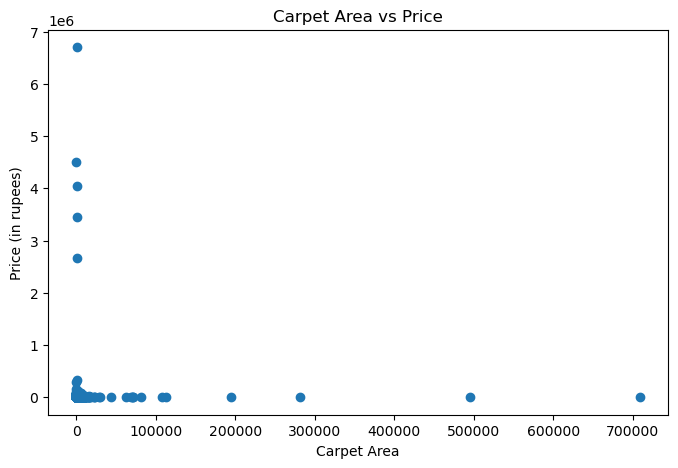

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Carpet Area'], df['Price (in rupees)'])
plt.title("Carpet Area vs Price")
plt.xlabel("Carpet Area")
plt.ylabel("Price (in rupees)")
plt.show()

In [15]:
%pip install seaborn

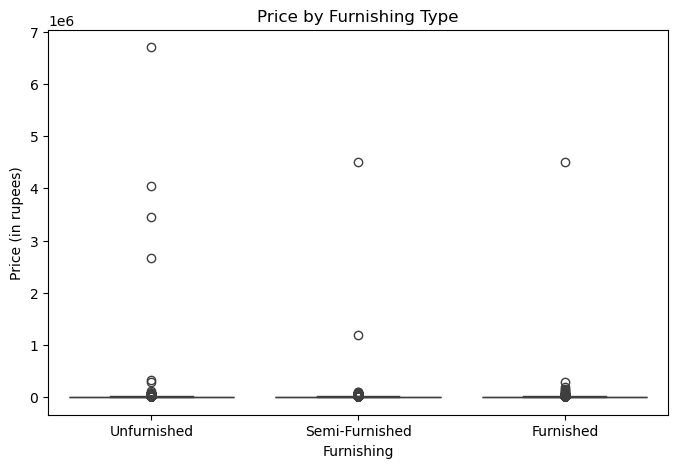

In [16]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Furnishing', y='Price (in rupees)', data=df)
plt.title("Price by Furnishing Type")
plt.show()

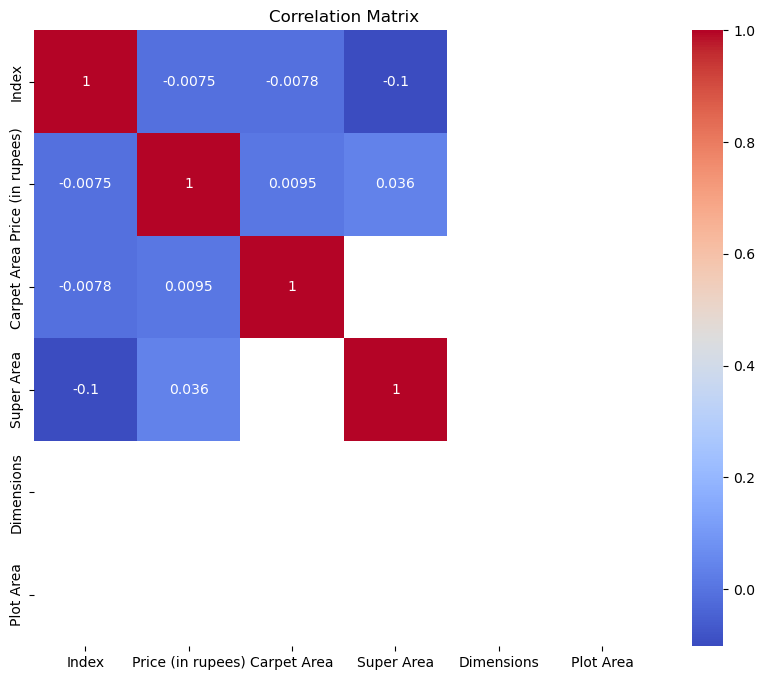

In [17]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

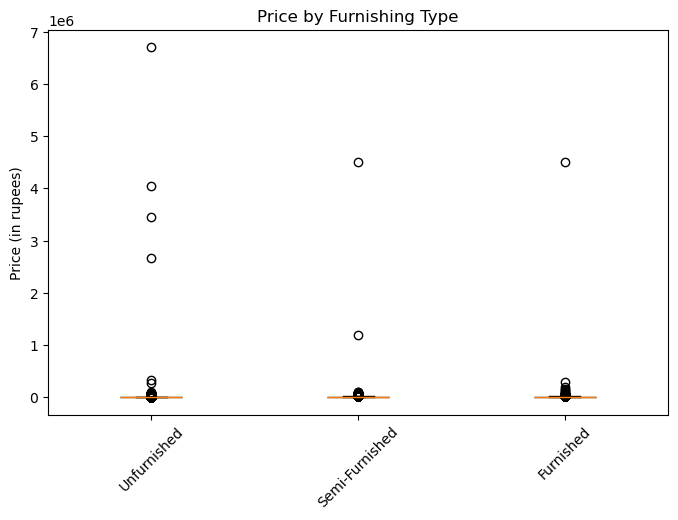

In [18]:
import numpy as np
import matplotlib.pyplot as plt

categories = df['Furnishing'].dropna().unique()

data = [
    df[df['Furnishing'] == cat]['Price (in rupees)'].dropna()
    for cat in categories
]

plt.figure(figsize=(8,5))
plt.boxplot(data, vert=True, patch_artist=True)
plt.xticks(range(1, len(categories)+1), categories, rotation=45)
plt.title("Price by Furnishing Type")
plt.ylabel("Price (in rupees)")
plt.show()

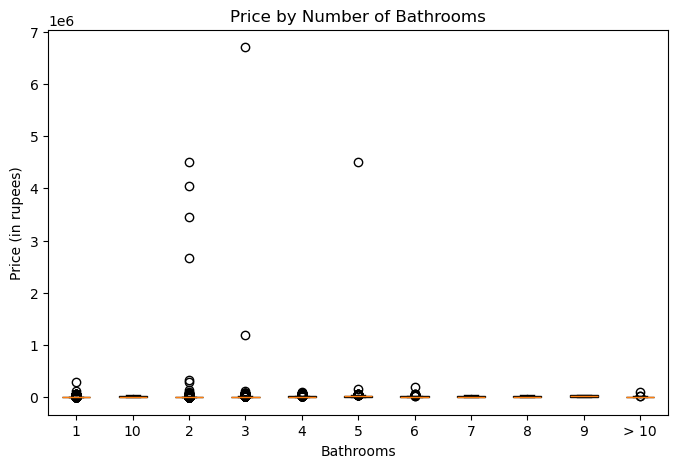

In [19]:
bathroom_categories = sorted(df['Bathroom'].dropna().unique())

data = [
    df[df['Bathroom'] == b]['Price (in rupees)'].dropna()
    for b in bathroom_categories
]

plt.figure(figsize=(8,5))
plt.boxplot(data, vert=True, patch_artist=True)
plt.xticks(range(1, len(bathroom_categories)+1), bathroom_categories)
plt.title("Price by Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price (in rupees)")
plt.show()

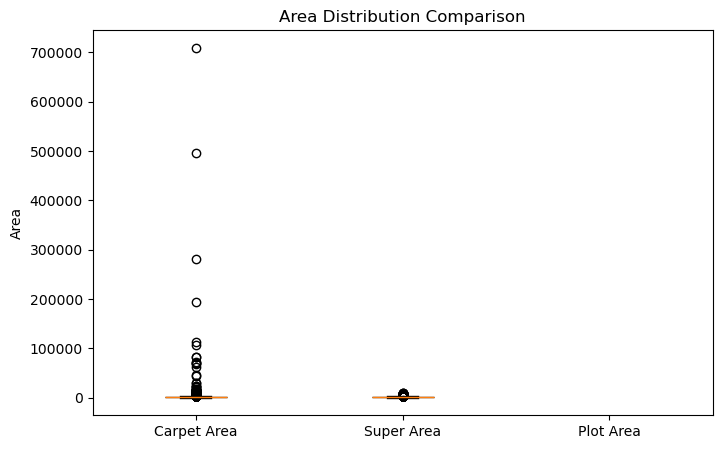

In [20]:
data = [
    df['Carpet Area'].dropna(),
    df['Super Area'].dropna(),
    df['Plot Area'].dropna()
]

labels = ['Carpet Area', 'Super Area', 'Plot Area']

plt.figure(figsize=(8,5))
plt.boxplot(data, vert=True, patch_artist=True)
plt.xticks([1,2,3], labels)
plt.title("Area Distribution Comparison")
plt.ylabel("Area")
plt.show()

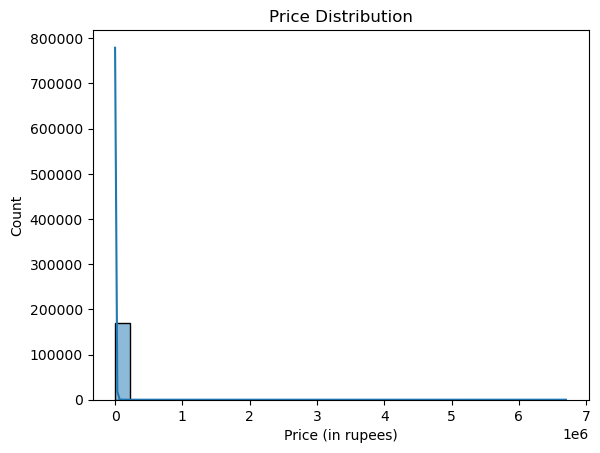

In [21]:
sns.histplot(df['Price (in rupees)'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

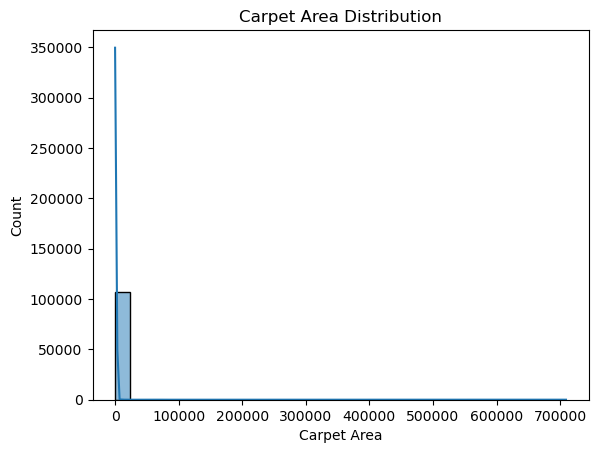

In [22]:
sns.histplot(df['Carpet Area'], bins=30, kde=True)
plt.title("Carpet Area Distribution")
plt.show()

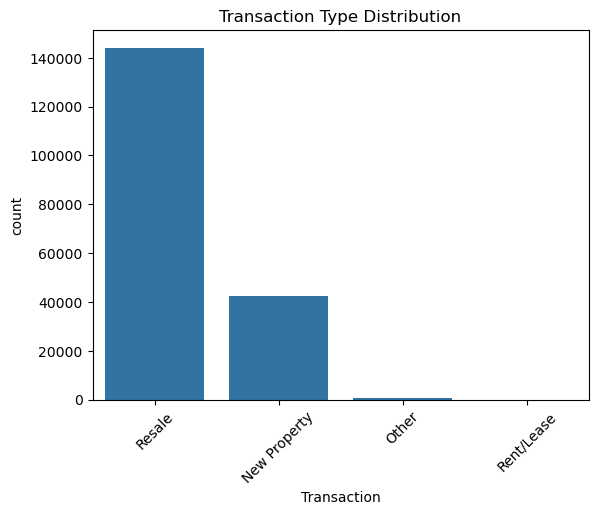

In [23]:
sns.countplot(x='Transaction', data=df)
plt.xticks(rotation=45)
plt.title("Transaction Type Distribution")
plt.show()

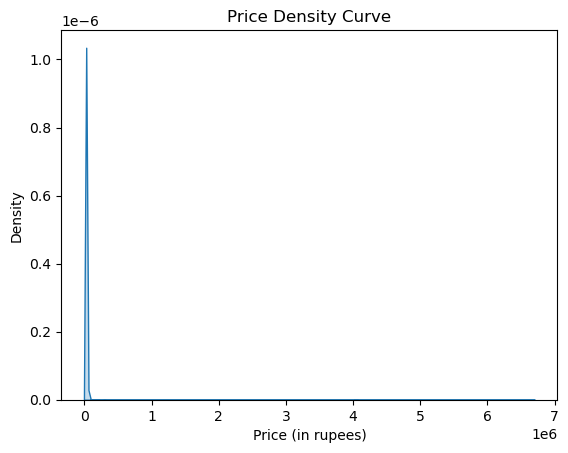

In [25]:
sns.kdeplot(df['Price (in rupees)'], fill=True)
plt.title("Price Density Curve")
plt.show()